# TALLER 2

Orianna Sanguino 
201413158

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import scipy.integrate as spint

In [3]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
refc=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)

# Datos Transmisión
dp=1 # Dientes del piñon
dpl=5 # Dientes del plato
ng=dpl/dp # Relación de Transmisión
etaf=0.95 # Eficiencia de transmisión

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)

# Datos Kart general
masa=152.0 # masa del Kart (kg)
m=masa
g=9.81 # Gravedad (m/s)
w=masa*g # peso del Kart (N)

# Datos Fuerzas de la fórmula de aceleración
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera

# Inercias
ii=5.2E-3 # Inercia motor de combustión (kg m^2) 

mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

rpi=0.01525#(m)
rpla=0.04096 #(m)
rhoac=7850.0 # Densidad del Acero (kg/m^3)
bpi=0.01 # Ancho piñon (m)
bpla=0.02 # Ancho plato (m)
vpi= bpi*np.pi*rpi**2 # Volumen del piñon (m^3)
vpla=bpla*np.pi*rpla**2 # Volumen del plato (m^3)
mpi=rhoac*vpi # Masa del piñon (kg)
mpla=rhoac*vpla # Masa del plato (kg)
ig=((mpi*(rpi**2))/2.0)+((mpla*(rpla**2))/2.0) # Inercia de la transmisión (kg-m^2)

ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)

# Fuerzas Aceleración
# Resistencia a la rodadura
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)

masa_eq = 200 # ESto toca calcularlo correctamente

i_w = 2*illd + 2*illt
i_d = ig + ieje

gamma = 1 # aceleracion


In [4]:
def f_rodadura(vx,w):
    fr=0.01*(1+((vx/0.277778)/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    return w*fr # (N)

In [5]:
def f_arrastre(vx):
    return (1.0/2.0)*rho*af*cd*(vx+vw)**2 # (N)

In [6]:
def t_engine(vx,r,Nc):
    omega_llanta = (vx/r)
    omega_motor = omega_llanta*Nc
    rpm = omega_motor*30/(np.pi)
    P = ((-0.00000004564538677*rpm**3)+(0.0001056995459*rpm**2)+(1.53209191*rpm)-1.895523696)
    T = P/omega_motor
    return T

In [7]:
def M_r(Nc,r,Iw,Id,Ie):
    mr=((Iw+Id)+Ie*Nc**2)/r**2
    return mr

In [8]:
def aceleracion (velv,t0):
    xx,vel = velv
    f_rod = f_rodadura(vel,w)
    f_drag = f_arrastre(vel)
    t_e = t_engine(vel,refc,ng)
    mr = M_r(ng,refc,i_w,i_d,ii)
    ax = ((t_e*ng*etaf/refc)-f_rod-f_drag)/(mr+m)
    resultado = vel,ax
    return resultado

In [9]:
def frenado (velv,t0):
    xx,vel = velv
    fren= (-20.5*etaf*ng)/refc 
    f_rod = f_rodadura(vel,w)
    f_drag = f_arrastre(vel)
    mr = M_r(ng,refc,i_w,i_d,ii)
    ac = (fren-f_rod-f_drag)/(mr+m)
    resultado = vel,ac
    return resultado

## Aceleración del vehículo

En este caso, se realiza un estudio para saber cuando llega el vehículo a su velocidad máxima, por lo que se comparan pares de datos obtenidos en secuencia, hasta el punto donde esta diferencia no sea significativa y se pueda concluir que el vehiculo no acelera más.

In [10]:
# Variables de tiempo
t_in=0.1
t_fin=10

# Condiciones iniciales
c_ini = [0,0.1]
t = np.linspace(t_in,t_fin,1000) 

sol_aceleracion = spint.odeint(aceleracion, c_ini, t)
vel = sol_aceleracion[:,1]
condi1= vel[-1]-vel[len(vel)-2]

while condi1 > 0.004: 
    t_fin = t_fin + 1 
    t = np.linspace(t_in,t_fin,1000) 
    sol_aceleracion = spint.odeint(aceleracion, c_ini, t) 
    vel = sol_aceleracion[:,1]  
    pos = sol_aceleracion[:,0] 
    condi1 = vel[-1]-vel[len(vel)-2]

## Frenado del vehículo 

In [11]:
# Variables de velocidad
v_max = vel[-1]

#Variables de posicion 
pos_inifr = pos[-1]

#Condiciones iniciales
c_fr = [pos_inifr,v_max]
t_des_in = t_fin 
t_des_fin = t_des_in + 0.5
t_des = np.linspace(t_des_in,t_des_fin,1000)


sol_frenado = spint.odeint(frenado, c_fr, t_des)
vel_des = sol_frenado[:,1]
pos_des = sol_frenado[:,0]

while vel_des[-1] > 0.1: 
    t_des_fin = t_des_fin + 0.5
    t_des = np.linspace(t_des_in,t_des_fin,100) 
    sol_frenado = spint.odeint(frenado, c_fr, t_des) 
    vel_des = sol_frenado[:,1] 
    pos_des = sol_frenado[:,0]

aceleracion=  np.gradient(vel)*100
desaceleracion= np.gradient(vel_des)*100


Finalmente se crean los vectores de tiempo, velocidad, posición y aceleración del vehiculo para poder realizar las gráficas de estudio.

In [12]:
t_final = np.concatenate((t,t_des)) 
v_final = np.concatenate((vel,vel_des)) 
p_final = np.concatenate((pos,pos_des)) 
a_final = np.concatenate((aceleracion,desaceleracion))

# RELACIÓN 39/11

(Considerado como caso base)

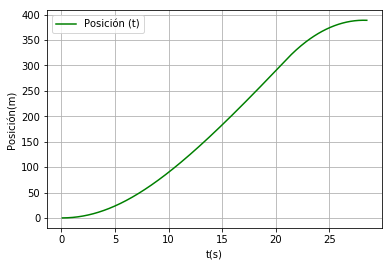

In [13]:
plt.plot(t_final, p_final, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

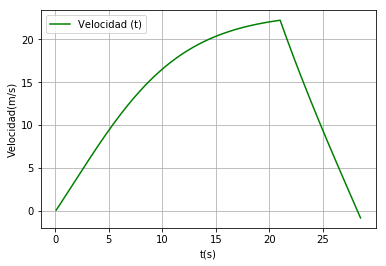

In [14]:
plt.plot(t_final, v_final, 'g', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

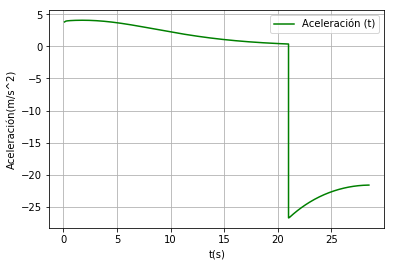

In [15]:
plt.plot(t_final, a_final, 'g', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Se puede evidenciar que en esta condición el vehículo logra una velocidad máxima de aproximadamente 22 m/s en un tiempo cercano a los 22 s. Adicionalmente, logra llegar a esta velocidad y frenar completamente en un tiempo aproximado de 28 s, tiempo en el cual logra recorrer una distancia cercana a los 400m.

# RELACIÓN 23/11

Con el fin de poder realizar un estudio del kart, en este caso se mantiene el igual al caso base el número de dientes del piñon, pero se disminuye el número de dientes del plato. 

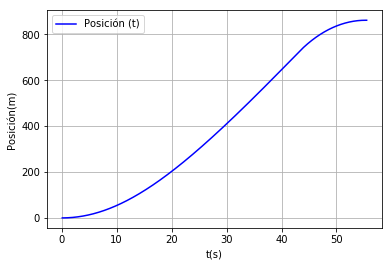

In [13]:
plt.plot(t_final, p_final, 'b', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

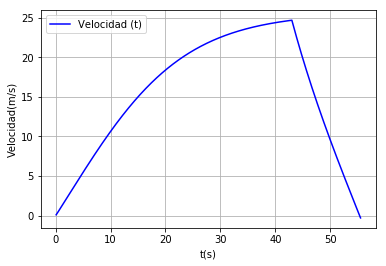

In [14]:
plt.plot(t_final, v_final, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

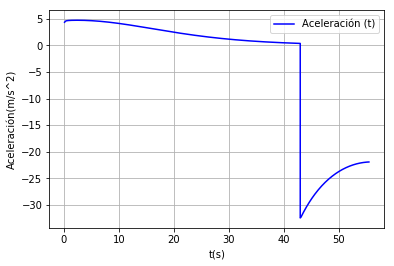

In [15]:
plt.plot(t_final, a_final, 'b', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

En este caso se evidencia que el vehiculo con esta relación de transmisión logra alcanzar una velocidad máxima de casi 25 m/s (mayor que en el caso base) en un tiempo aproximado de 42 s (mayor que el caso base). En el proceso de alcanzar la velocidad máxima y frenar completamente tarda cerca a 55s, recorriendo una distancia de aproximadamente 850m (mayor que el caso anterior). 

# RELACIÓN 39/23

Ahora, se mantiene el número de dientes del plato pero se aumenta el número de dientes del piñon.

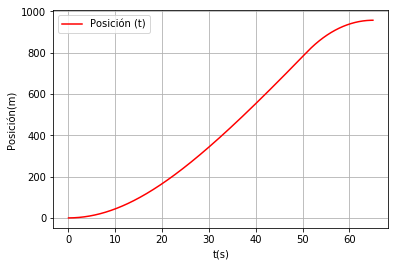

In [13]:
plt.plot(t_final, p_final, 'r', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

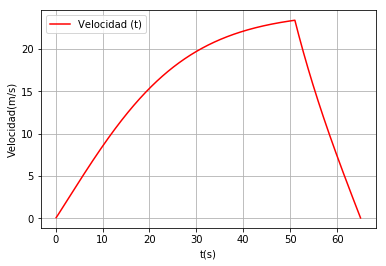

In [14]:
plt.plot(t_final, v_final, 'r', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

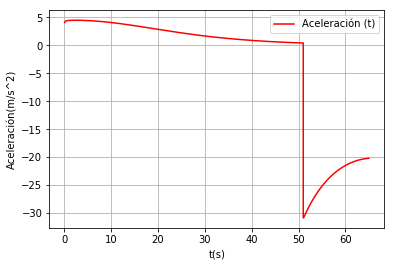

In [15]:
plt.plot(t_final, a_final, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

En este caso, el vehiculo llega a una velocidad máxima cercana a los 25 m/s, la cual es mayor que el caso base pero muy similar a la condición donde se incrementa la cantidad de dientes del piñon, pero en este caso tarda 50s, tiempo que es mayor a los dos casos estudiados anteriormente. Tarda cerca de 63s en el proceso de alcanzar la velocidad máxima y posterior frenado (igualmente es un tiempo mayor que el estudiado). En este proceso alcanza a recorrer una distancia de casi 1000m, dato que es significativamente mayor que los vistos en los casos anteriores. 

# RELACIÓN 39/11- CAMBIO DE MASA A LA MITAD 

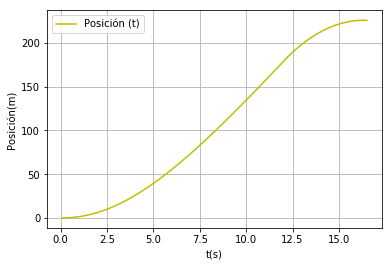

In [13]:
plt.plot(t_final, p_final, 'y', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

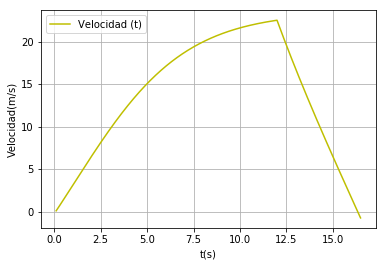

In [14]:
plt.plot(t_final, v_final, 'y', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

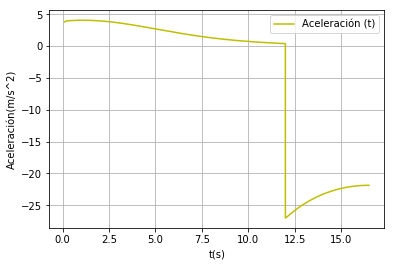

In [15]:
plt.plot(t_final, a_final, 'y', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Variando la masa del vehiculo, se puede observar que la velocidad máxima no varia significativamente con el caso base, sin embar el tiempo en el que se alcanza esta velocidad si es menor, siendo en este caso aproximadamente 12,4 s. Dicho esto, la distancia recorrida en el proceso para alcanzar la velocidad máxima y frenado del vehiculo es menos ala del caso base, siendo de aproximadamente 250m, distancia que se recorre en casi 15,3s.

## Conclusión

Observando los resultados obtenidos es podible decir que de al modificar los parametros mencionados, la velocidad máxima alcanzada por el vehiculo es muy similar, el dato que realmente varia es el tiempo en el cual se alcanza esta. Si se desea alcanzar la velocidad máxima en menor tiempo se sugiere disminuir la masa del vehiculo pues esta es directamente proporcional al tiempo empleado para alcanzar dicha velocidad. Sin embargo, en caso de que la masa no pueda ser variable, como segunda opción se recomendaria (de las opciones estudiadas en este caso) empelar la opcion base, relación 39/11, pues comparada con los otros dos casos presenta un tiempo menor y por ende una distancia recorrida menor. De lo dicho anteriormente, se puede decir que lo importante es que la relación de transmision no sea baja, pues el caso con menor tiempo (estudiando la misma masa) se dio en el caso en el cual se presentaba una relación de mayor magnitud.